In [20]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [21]:
# set datetime index
resampled_data = pd.read_csv("Sprint_Resampled Data.csv")
resampled_data['Date'] = resampled_data['Date'].apply(pd.to_datetime)
resampled_data = resampled_data.set_index('Date')

In [22]:
resampled_data['U.S. Field Production of Crude Oil (Thousand Barrels)']

Date
1920-01-31     34008.0
1920-02-29     33193.0
1920-03-31     36171.0
1920-04-30     34945.0
1920-05-31     36622.0
1920-06-30     36663.0
1920-07-31     37746.0
1920-08-31     38906.0
1920-09-30     37521.0
1920-10-31     39584.0
1920-11-30     38609.0
1920-12-31     38961.0
1921-01-31     38138.0
1921-02-28     35524.0
1921-03-31     41105.0
1921-04-30     40233.0
1921-05-31     42189.0
1921-06-30     40548.0
1921-07-31     40461.0
1921-08-31     41109.0
1921-09-30     36763.0
1921-10-31     35832.0
1921-11-30     38108.0
1921-12-31     42173.0
1922-01-31     43696.0
1922-02-28     41314.0
1922-03-31     47188.0
1922-04-30     45167.0
1922-05-31     47002.0
1922-06-30     46087.0
                ...   
2017-03-31    284029.0
2017-04-30    273009.0
2017-05-31    284660.0
2017-06-30    273236.0
2017-07-31    286288.0
2017-08-31    286702.0
2017-09-30    285356.0
2017-10-31    299250.0
2017-11-30    302120.0
2017-12-31    309172.0
2018-01-31    310548.0
2018-02-28    287879.0
2018-0

In [23]:
# handling missing value
test = resampled_data['1991-3': '2019-5'].dropna(axis=1)
train = test[:int(0.8*(len(test)))]
valid = test[int(0.8*(len(test))):]
resampled_data
model = VAR(endog=train)
model_fit = model.fit()
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

/home/yuntong/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [29]:
test.columns
# production col 0


Index(['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)',
       'U.S. Field Production of Crude Oil (Thousand Barrels)',
       'Weekly U.S. Product Supplied of Petroleum Products  (Thousand Barrels per Day)',
       'Weekly U.S. Product Supplied of Finished Motor Gasoline  (Thousand Barrels per Day)',
       'Weekly U.S. Product Supplied of Kerosene-Type Jet Fuel  (Thousand Barrels per Day)',
       'Weekly U.S. Product Supplied of Distillate Fuel Oil  (Thousand Barrels per Day)',
       'Weekly U.S. Product Supplied of Residual Fuel Oil  (Thousand Barrels per Day)',
       'Weekly U.S. Exports of Crude Oil and Petroleum Products  (Thousand Barrels per Day)',
       'Weekly U.S. Exports of Crude Oil  (Thousand Barrels per Day)',
       'Weekly U.S. Exports of Total Petroleum Products  (Thousand Barrels per Day)',
       'Weekly U.S. Imports of Crude Oil and Petroleum Products  (Thousand Barrels per Day)',
       'Weekly U.S. Imports of Crude Oil  (Thousand Barrels per Day)',
    

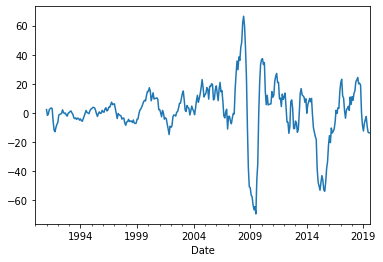

In [13]:
# remove seasonality
test['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'].diff(12).plot()

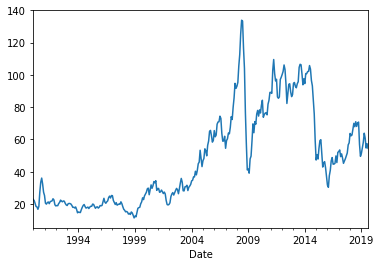

In [14]:
test['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'].plot()

In [5]:
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[test.columns])
pred = pred.set_index(valid.index)

for j in range(0,18):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]
# for i in test.columns:
#     print('rmse value for', i, 'is : ', np.sqrt(mean_squared_error(pred[i], valid[i])))

/home/yuntong/.local/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


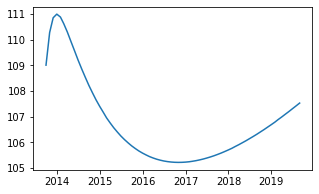

In [6]:
fig, ax = plt.subplots(figsize=(5, 3))
l1 = plt.plot(pred['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'])


/home/yuntong/.local/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


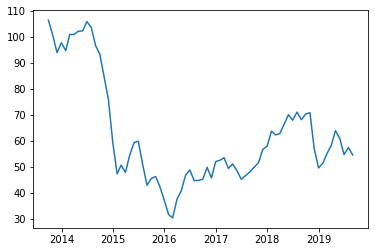

In [6]:
l2 = plt.plot(valid['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'])

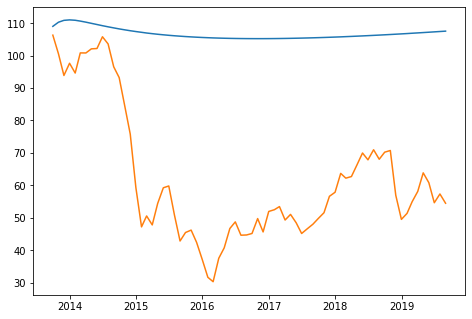

In [22]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(pred['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'], label="x**2")
ax.plot(valid['Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'], label="x**3")